# Pandas cheat sheet



In this blog, I go through some of the basics of pandas

###Importing and using some basic functions of pandas

In [28]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#reading an already existing csv file in a dataframe
raw = pd.read_csv("https://pythonandvba.com/youtube-data.csv")

In [13]:
#printing the first 5 rows
raw.head(5)

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
0,Wn9L1MD_y0Y,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,885,26.36,3057,265002,2152704,6.71
1,svcv8uub0D0,How to Create an Excel Data Entry Form in 10 M...,22-May-21,207,28.48,3112,99259,1069755,5.70
2,Sb0A9i6d320,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,192,13.14,10175,442044,11550064,2.79
3,VwzaNjpcEZ0,Send BULK SMS From Your OWN Number Using EXCEL...,10-Jul-21,158,27.57,537,50270,341500,9.04
4,nJHrSvYxzjE,Deploy Your Streamlit Web App on Heroku For Fr...,20-Mar-21,114,32.44,966,30941,308074,5.22


In [ ]:
#printing the information
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             107 non-null    object 
 1   Video title                         107 non-null    object 
 2   Video publish time                  102 non-null    object 
 3   Comments added                      107 non-null    int64  
 4   Average percentage viewed (%)       107 non-null    float64
 5   Likes                               107 non-null    int64  
 6   Views                               107 non-null    int64  
 7   Impressions                         107 non-null    int64  
 8   Impressions click-through rate (%)  106 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ KB


In [ ]:
#checking for missing values
raw.isna().sum()

Content                               0
Video title                           0
Video publish time                    5
Comments added                        0
Average percentage viewed (%)         0
Likes                                 0
Views                                 0
Impressions                           0
Impressions click-through rate (%)    1
dtype: int64

In [ ]:
#gives the columns with missing values
raw[raw.isnull().any(axis="columns")]

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
94,8E4se9Ah5o8,MyToolBelt Installation,NaN,5,72.18,22,1309,13,0.00
96,V3Csrk--laM,Create Invoice Filepath,NaN,5,70.11,1,16,5,0.00
100,RnTqlKzQhRY,PySimpleGUI Retrieve Data,NaN,4,85.97,6,182,78,2.56
105,l4Dd1xLfNVY,xlwings - demo,NaN,0,102.23,0,3,0,NaN
106,pqIjey6Cbhw,"How to resolve ""pytube.exceptions.RegexMatchEr...",NaN,0,44.91,0,13,3,0.00


In [ ]:
#finding the top 3 rows with most values in a particular column
raw.nlargest(3, columns=["Impressions"])

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
2,Sb0A9i6d320,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,192,13.14,10175,442044,11550064,2.79
0,Wn9L1MD_y0Y,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,885,26.36,3057,265002,2152704,6.71
1,svcv8uub0D0,How to Create an Excel Data Entry Form in 10 M...,22-May-21,207,28.48,3112,99259,1069755,5.70


### Finding correlation between columns and plotting it in more readable way

In [14]:
raw.corr()

<ipython-input-14-63e106c4d332>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw.corr()


,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
Comments added,1.000000,-0.141652,0.484353,0.672014,0.362981,0.224351
Average percentage viewed (%),-0.141652,1.000000,-0.202818,-0.189377,-0.163310,-0.241190
Likes,0.484353,-0.202818,1.000000,0.958418,0.958740,0.079380
Views,0.672014,-0.189377,0.958418,1.000000,0.923668,0.134627
Impressions,0.362981,-0.163310,0.958740,0.923668,1.000000,-0.015123
Impressions click-through rate (%),0.224351,-0.241190,0.079380,0.134627,-0.015123,1.000000


In [ ]:
raw.corr().style.background_gradient(cmap='RdBu',vmin=-1,vmax=1)

<ipython-input-8-bd82f12bf42d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw.corr().style.background_gradient(cmap='RdBu',vmin=-1,vmax=1)


,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
Comments added,1.000000,-0.141652,0.484353,0.672014,0.362981,0.224351
Average percentage viewed (%),-0.141652,1.000000,-0.202818,-0.189377,-0.163310,-0.241190
Likes,0.484353,-0.202818,1.000000,0.958418,0.958740,0.079380
Views,0.672014,-0.189377,0.958418,1.000000,0.923668,0.134627
Impressions,0.362981,-0.163310,0.958740,0.923668,1.000000,-0.015123
Impressions click-through rate (%),0.224351,-0.241190,0.079380,0.134627,-0.015123,1.000000


<ipython-input-9-54b507011175>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(raw.corr(),cmap="RdBu",annot=True, fmt=".3f")


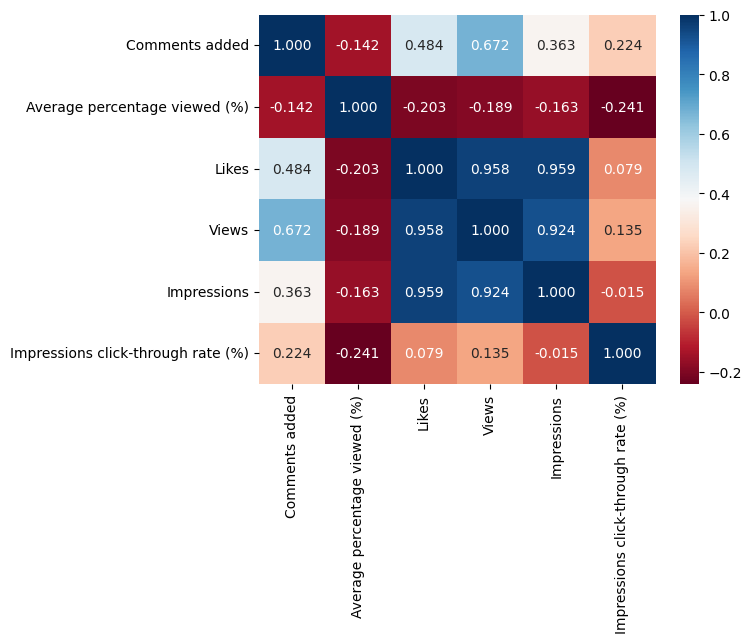

In [ ]:
heatmap=sns.heatmap(raw.corr(),cmap="RdBu",annot=True, fmt=".3f")

### Plotting pairwise distributions

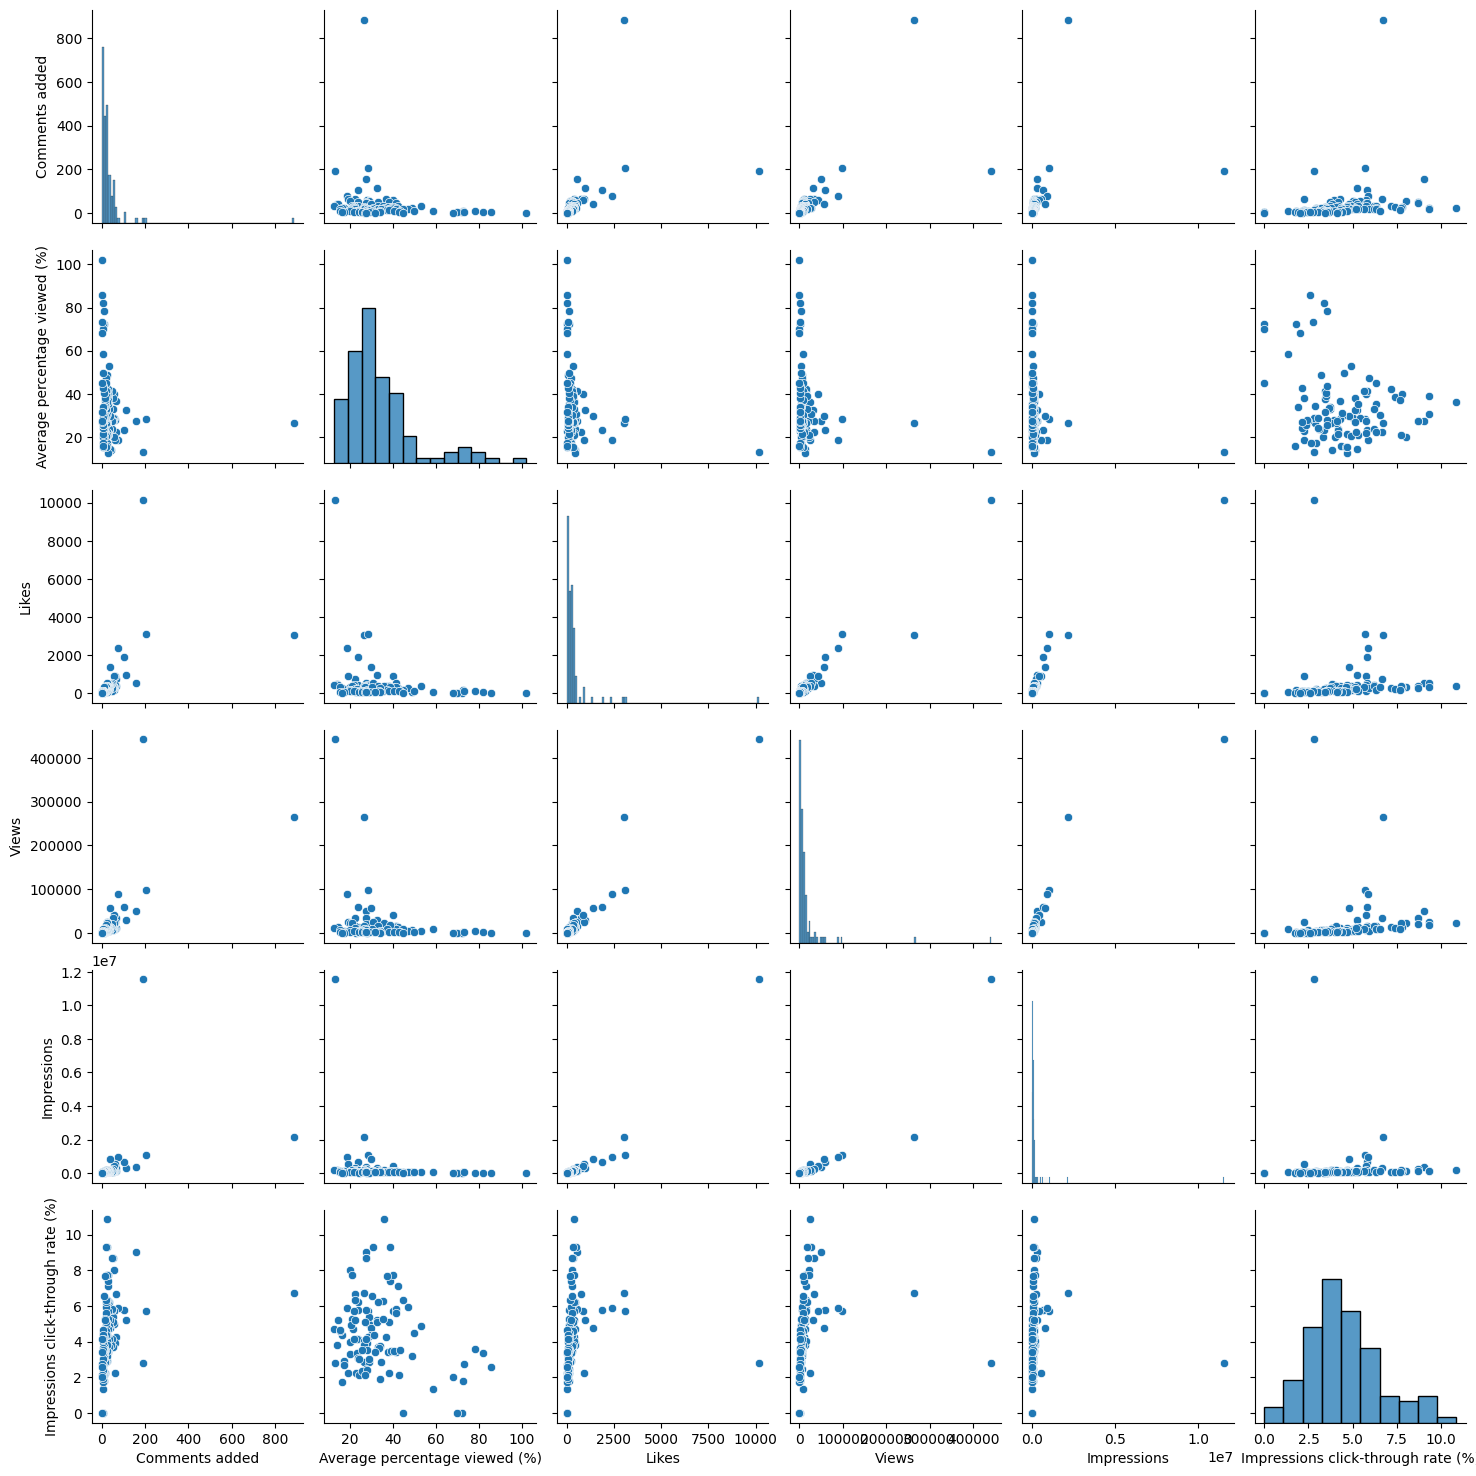

In [ ]:
sns.pairplot(raw)

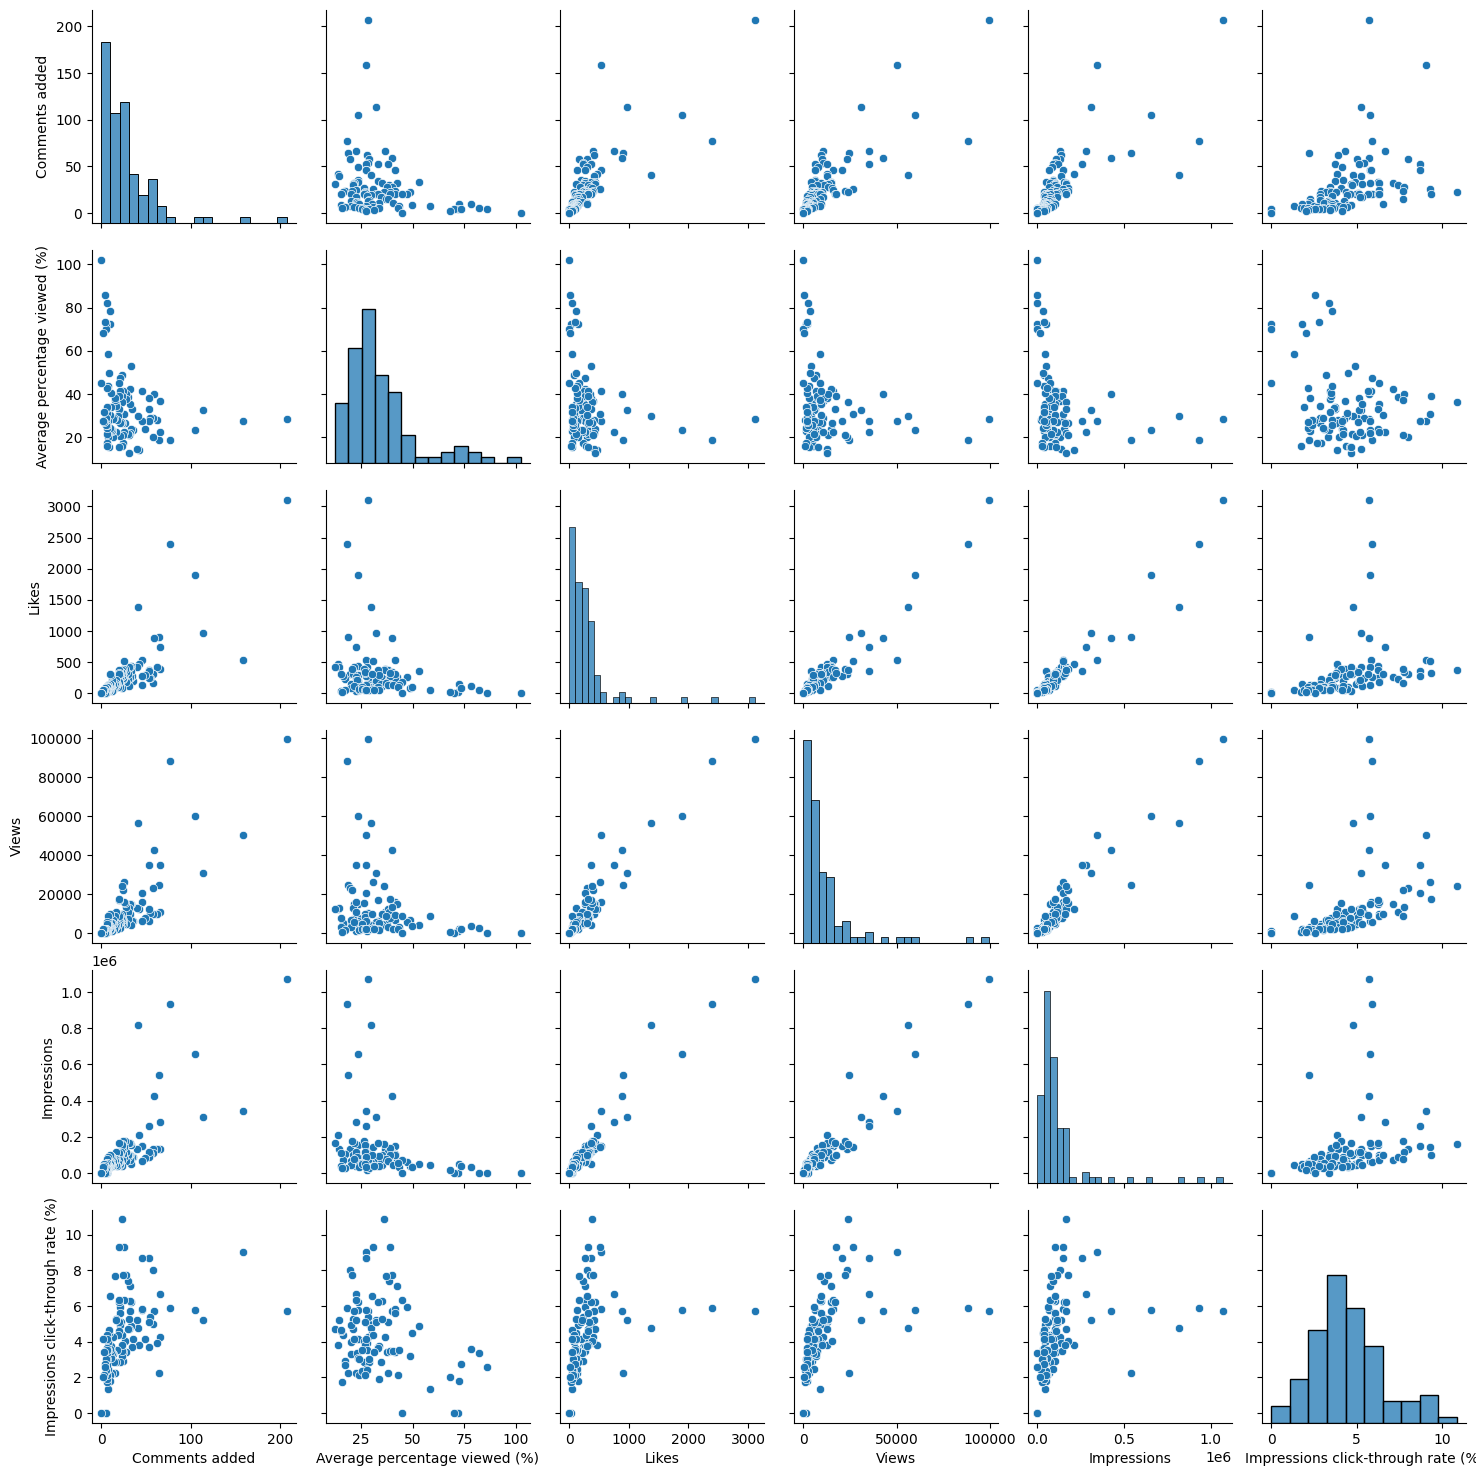

In [ ]:
# removing outliers for better visualization
sns.pairplot(raw[raw["Views"]<raw["Views"].quantile(0.99)])

### Visualizing time series data

In [18]:
#converting the date column from object to datetime
raw["Video publish time"]=pd.to_datetime(raw["Video publish time"])
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Content                             107 non-null    object        
 1   Video title                         107 non-null    object        
 2   Video publish time                  102 non-null    datetime64[ns]
 3   Comments added                      107 non-null    int64         
 4   Average percentage viewed (%)       107 non-null    float64       
 5   Likes                               107 non-null    int64         
 6   Views                               107 non-null    int64         
 7   Impressions                         107 non-null    int64         
 8   Impressions click-through rate (%)  106 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 7.6+ KB


In [19]:
# Sorting according to the date
raw.sort_values(by="Video publish time",inplace=True)

<Axes: xlabel='Video publish time'>

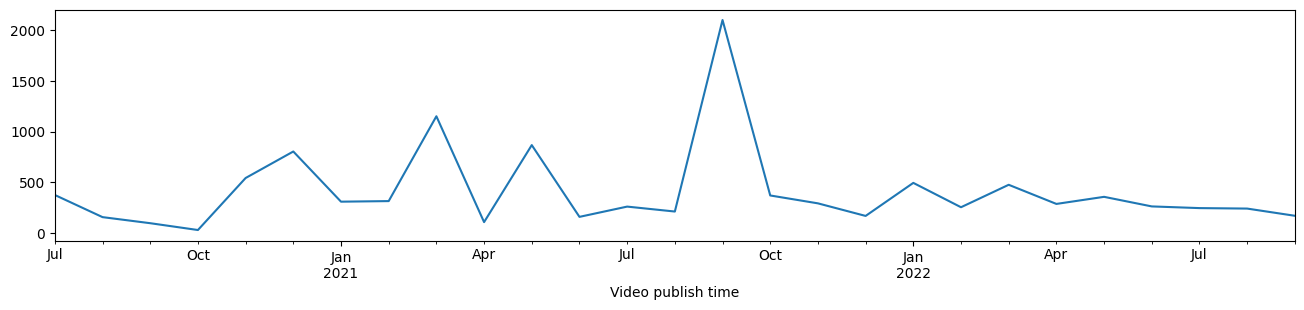

In [27]:
#plot the likes with time
(raw
 .set_index("Video publish time")
 .sort_index()
 .Likes
 .resample("m")
 .mean()
 .fillna(0)
 .plot(figsize=(16,3))
)

We can plot a more interactive time series plot using plotly

In [33]:
def plot_timeseries(df, columns):
    df = df.set_index("Video publish time").sort_index()
    fig = px.line(
        df,
        x=df.index,
        y=columns,
        template="simple_white",
        hover_name="Video title",
        title=f"Development: {', '.join(columns).title()}",
    )
    fig.update_layout(hovermode="x unified", margin=dict(l=0, r=0, t=50, b=5))
    return fig

fig = plot_timeseries(df=raw, columns=["Likes","Comments added"])
fig.show()

I have used the following as reference for trying out these functionalities: https://www.youtube.com/watch?v=RXEP1R_ZNrs 